Number of electrons:                         8
Number of Gauss type atomic orbitals (GTOs): 5
Number of Gaussian primitives (GFs):         15

Included atomic orbitals:
   O 1s
   O 2s
   O 2px
   O 2py
   O 2pz

Radial basis functions (only one given per angular momentum (i.e. px=py=pz))

Radial basis 1 with angular momentum l=0 formed by contraction of 3 GFs
    GF | Exponent     | Contraction coefficient
–––––––+––––––––––––––+––––––––––––––––––––––––
     1 | 130.70932000 |   0.15432897
     2 |  23.80886100 |   0.53532814
     3 |   6.44360830 |   0.44463454


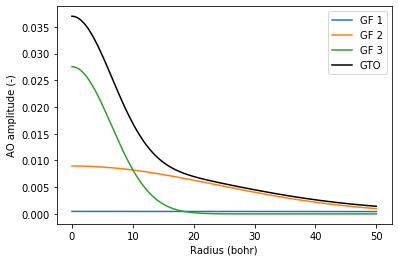


Radial basis 2 with angular momentum l=0 formed by contraction of 3 GFs
    GF | Exponent     | Contraction coefficient
–––––––+––––––––––––––+––––––––––––––––––––––––
     1 |   5.03315130 |  -0.09996723
     2 |   1.16959610 |   0.39951282
     3 |   0.38038900 |   0.70011546


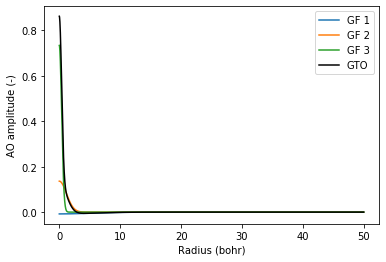


Radial basis 3 with angular momentum l=1 formed by contraction of 3 GFs
    GF | Exponent     | Contraction coefficient
–––––––+––––––––––––––+––––––––––––––––––––––––
     1 |   5.03315130 |   0.15591627
     2 |   1.16959610 |   0.60768371
     3 |   0.38038900 |   0.39195739


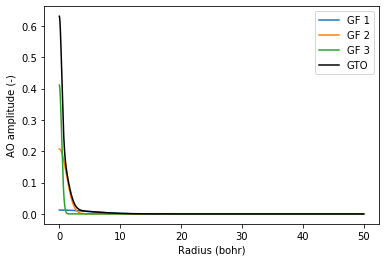

In [129]:
from pyscf import gto, scf, ao2mo
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#change input here
element='O'
basis_set='STO-3G'

#build molecule
mol = gto.Mole()
mol.atom = [[element, (0, 0, 0)]]
mol.spin = mol.nelectron % 2 #create singlet or doublet
mol.basis = basis_set
mol.build()

#extract basis set info
labels = gto.ao_labels(mol, False)
print('Number of electrons:                         {}'.format(mol.nelectron))
print('Number of Gauss type atomic orbitals (GTOs): {}'.format(mol.nao_nr()))
print('Number of Gaussian primitives (GFs):         {}'.format(mol.npgto_nr()))
print()
print('Included atomic orbitals:')
for i in gto.ao_labels(mol, False):
    print('   {} {}{}'.format(i[1], i[2], i[3]))
print()
print('Radial basis functions (only one given per angular momentum (i.e. px=py=pz))')
for i in range(mol.nbas):
    print()
    print('Radial basis {} with angular momentum l={} formed by contraction of {} GFs'.format(i+1, 
                                                                                     mol.bas_angular(i),
                                                                                     mol.bas_nprim(i)))
    
    fig, ax = plt.subplots()
    x = np.arange(0, 50, 0.01)
    s = np.zeros_like(x)
    
    print('    GF | Exponent     | Contraction coefficient')
    print('–––––––+––––––––––––––+––––––––––––––––––––––––')
    for j in range(mol.bas_nprim(i)):
        print('    {0:2d} | {1:12.8f} | {2:12.8f}'.format(j+1, mol.bas_exp(i)[j], mol.bas_ctr_coeff(i)[j][0]))
        
        y = mol.bas_ctr_coeff(i)[j][0] * norm.pdf(x, 0, mol.bas_exp(i)[j])
        s = np.add(s, y)
        ax.plot(x,y, label='GF {}'.format(j+1))
    
    ax.plot(x,s, label='GTO', c='black')
    ax.set_xlabel('Radius (bohr)')
    ax.set_ylabel('AO amplitude (-)')
    ax.legend()
    plt.show()
